# ИУ5-62Б Ковалев Сергей РК2 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/Users/set27/Downloads/states_all.csv')

In [3]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
data = data.fillna(1)

In [5]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [8]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,1.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,1.0,1.0,731634.0,208.0,252.0,207.0,1.0
1,1992_ALASKA,ALASKA,1992,1.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,1.0,1.0,122487.0,1.0,1.0,1.0,1.0
2,1992_ARIZONA,ARIZONA,1992,1.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,1.0,1.0,673477.0,215.0,265.0,209.0,1.0
3,1992_ARKANSAS,ARKANSAS,1992,1.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,1.0,1.0,441490.0,210.0,256.0,211.0,1.0
4,1992_CALIFORNIA,CALIFORNIA,1992,1.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,1.0,1.0,5254844.0,208.0,261.0,202.0,1.0


In [9]:
parts = np.split(data, [1,17,18], axis=1)
X = parts[0]
Y = parts[1]
G = parts[2]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', G.head())

Входные данные:

        PRIMARY_KEY
0     1992_ALABAMA
1      1992_ALASKA
2     1992_ARIZONA
3    1992_ARKANSAS
4  1992_CALIFORNIA 

Выходные данные:

   GRADES_12_G
0       41167
1        6714
2       37410
3       27651
4      270675


<AxesSubplot:>

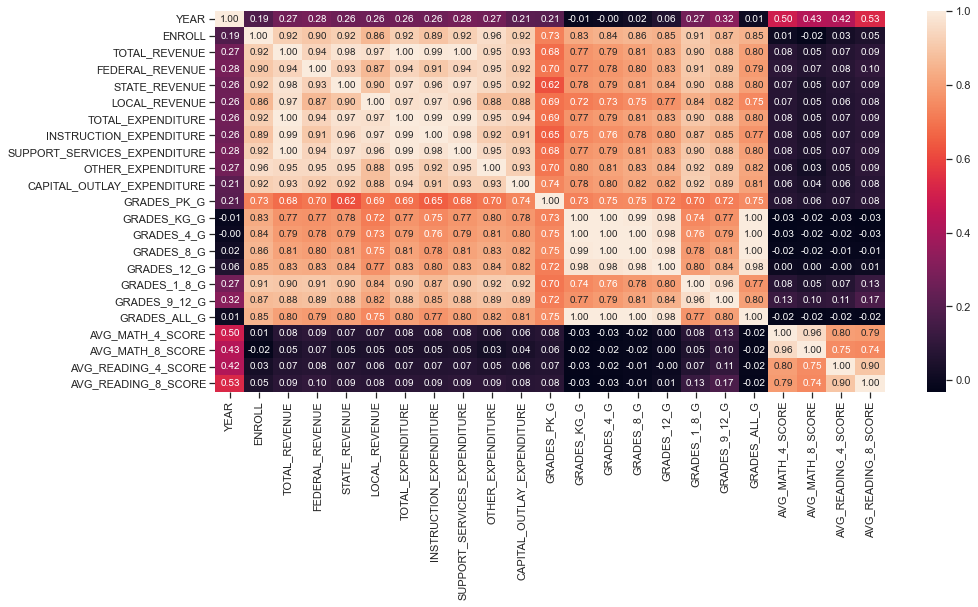

In [10]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [23]:
X = data.drop(['PRIMARY_KEY','ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','STATE','STATE_REVENUE','LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G'], axis = 1)
Y = data.YEAR
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    YEAR
0  1992
1  1992
2  1992
3  1992
4  1992 

Выходные данные:

 0    1992
1    1992
2    1992
3    1992
4    1992
Name: YEAR, dtype: int64


In [24]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       YEAR
82    1993
1579  1989
1544  1989
1323  2017
249   1996 

Входные параметры тестовой выборки:

       YEAR
1101  2013
6     1992
746   2006
1320  1989
473   2001 

Выходные параметры обучающей выборки:

 82      1993
1579    1989
1544    1989
1323    2017
249     1996
Name: YEAR, dtype: int64 

Выходные параметры тестовой выборки:

 1101    2013
6       1992
746     2006
1320    1989
473     2001
Name: YEAR, dtype: int64


In [25]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [26]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [27]:
pred_y = svc.predict(X_test)

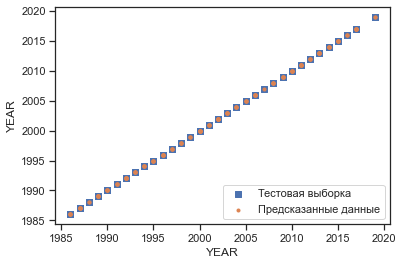

In [28]:
plt.scatter(X_test.YEAR, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.YEAR, pred_y, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('YEAR')
plt.ylabel ('YEAR')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [31]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.0
Средняя квадратичная ошибка: 0.0
Median absolute error: 0.0
Коэффициент детерминации: 1.0


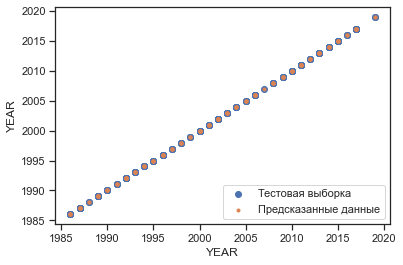

In [32]:
plt.scatter(X_test.YEAR, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.YEAR, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('YEAR')
plt.ylabel('YEAR')
plt.show()